# Load Modules

In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
from tqdm import tqdm 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
import xgboost as xgb 
import pandas as pd 
import sklearn.neighbors._base
from os import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest 
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
sns.set_style('whitegrid')

# Load Data

In [2]:
# Features to be used
phot_flux = [
    "photflux_aper_s",
    "photflux_aper_b",
    "photflux_aper_u",
    "photflux_aper_h",
    "photflux_aper_m",
]
en_flux = [
    "flux_aper_s",
    "flux_aper_h",
    "flux_aper_b",
    "flux_aper_u",
    "flux_aper_m",
]
hard = [
    "hard_hm",
    "hard_hs",
    "hard_ms",
]
powlaw_fit = [
    "flux_powlaw",
    "powlaw_gamma",
    "powlaw_nh",
    "powlaw_ampl",
    "powlaw_stat",
]

bb_fit = [
    "flux_bb",
    "bb_kt",
    "bb_nh",
    "bb_ampl",
    "bb_stat",
]
brems_fit = [
    "flux_brems",
    "brems_kt",
    "brems_nh",
    "brems_norm",
    "brems_stat",
]

intra_obs_var = [
    "var_prob_b",
    "ks_prob_b",
    "kp_prob_b",
    "var_sigma_b",
    "var_mean_b",
    "var_min_b",
    "var_max_b",
    "var_index_h",
    "var_prob_h",
    "ks_prob_h",
    "kp_prob_h",
    "var_sigma_h",
    "var_mean_h",
    "var_min_h",
    "var_max_h",
    "var_index_m",
    "var_prob_m",
    "ks_prob_m",
    "kp_prob_m",
    "var_sigma_m",
    "var_mean_m",
    "var_min_m",
    "var_max_m",
    "var_index_s",
    "var_prob_s",
    "ks_prob_s",
    "kp_prob_s",
    "var_sigma_s",
    "var_mean_s",
    "var_min_s",
    "var_max_s",
    "var_index_u",
    "var_prob_u",
    "ks_prob_u",
    "kp_prob_u",
    "var_sigma_u",
    "var_mean_u",
    "var_min_u",
    "var_max_u",
]

inter_ob_var = [
    "var_inter_index_b",
    "var_inter_prob_b",
    "var_inter_sigma_b",
    "var_inter_index_h",
    "var_inter_prob_h",
    "var_inter_sigma_h",
    "var_inter_index_m",
    "var_inter_prob_m",
    "var_inter_sigma_m",
    "var_inter_index_s",
    "var_inter_prob_s",
    "var_inter_sigma_s",
    "var_inter_index_u",
    "var_inter_prob_u",
    "var_inter_sigma_u",
]

info_col = [
'src_id',
 'num_obs',
 'sepn',
 'name',
 'ra',
 'dec',
 'livetime',
 'significance',
 'likelihood',
]


In [190]:
feat_to_use = info_col + phot_flux + en_flux + powlaw_fit +bb_fit +hard+ intra_obs_var +inter_ob_var 
data_cv = pd.read_csv('cv_data.csv' , index_col='obs_id')[feat_to_use]
data_cv.insert(0 , 'class' , ['CV']*len(data_cv))
data_pl  =  pd.read_csv('pulsar_data.csv' , index_col = 'obs_id')[feat_to_use]
data_pl.insert(0 , 'class' , ['PL']*len(data_pl))

<AxesSubplot:xlabel='num_obs', ylabel='Count'>

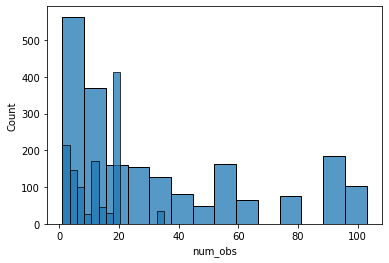

In [191]:
sns.histplot(data_cv['num_obs'])
sns.histplot(data_pl['num_obs'])

In [192]:
data_cv

,class,src_id,num_obs,sepn,name,ra,dec,livetime,significance,likelihood,...,var_inter_sigma_h,var_inter_index_m,var_inter_prob_m,var_inter_sigma_m,var_inter_index_s,var_inter_prob_s,var_inter_sigma_s,var_inter_index_u,var_inter_prob_u,var_inter_sigma_u
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_0_obs_0,CV,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,4103.7,52.93,16618.73000,...,NaN,NaN,NaN,NaN,5.0,0.989,2.546000e-05,NaN,NaN,NaN
CV_0_obs_1,CV,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,...,NaN,NaN,NaN,NaN,5.0,0.989,2.546000e-05,NaN,NaN,NaN
CV_0_obs_2,CV,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,...,NaN,NaN,NaN,NaN,5.0,0.989,2.546000e-05,NaN,NaN,NaN
CV_0_obs_3,CV,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3904.6,52.93,16618.73000,...,NaN,NaN,NaN,NaN,5.0,0.989,2.546000e-05,NaN,NaN,NaN
CV_0_obs_4,CV,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,...,NaN,NaN,NaN,NaN,5.0,0.989,2.546000e-05,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CV_309_obs_0,CV,CV_309,1,0.877141,2CXO J174311.1-271622,265.79630,-27.27295,2156.9,2.53,20.88602,...,0.000004,5.0,0.802,1.246000e-06,NaN,NaN,NaN,NaN,NaN,NaN
CV_310_obs_0,CV,CV_310,1,3.687046,2CXO J040556.8+714816,61.48706,71.80466,28678.8,4.86,53.30116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_311_obs_0,CV,CV_311,1,0.073509,2CXO J191051.9-595840,287.71650,-59.97791,37966.9,2.61,27.11662,...,NaN,6.0,0.983,1.822000e-07,5.0,0.774,1.036000e-07,NaN,NaN,NaN


In [193]:
data = pd.concat([data_cv , data_pl] , axis=0)
data

,class,src_id,num_obs,sepn,name,ra,dec,livetime,significance,likelihood,...,var_inter_sigma_h,var_inter_index_m,var_inter_prob_m,var_inter_sigma_m,var_inter_index_s,var_inter_prob_s,var_inter_sigma_s,var_inter_index_u,var_inter_prob_u,var_inter_sigma_u
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_0_obs_0,CV,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.272150,4103.7,52.93,16618.73000,...,NaN,NaN,NaN,NaN,5.0,0.989,0.000025,NaN,NaN,NaN
CV_0_obs_1,CV,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.272150,3907.5,52.93,16618.73000,...,NaN,NaN,NaN,NaN,5.0,0.989,0.000025,NaN,NaN,NaN
CV_0_obs_2,CV,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.272150,3907.5,52.93,16618.73000,...,NaN,NaN,NaN,NaN,5.0,0.989,0.000025,NaN,NaN,NaN
CV_0_obs_3,CV,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.272150,3904.6,52.93,16618.73000,...,NaN,NaN,NaN,NaN,5.0,0.989,0.000025,NaN,NaN,NaN
CV_0_obs_4,CV,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.272150,3907.5,52.93,16618.73000,...,NaN,NaN,NaN,NaN,5.0,0.989,0.000025,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLSR_259_obs_0,PL,PLSR_259,1,1.037917,2CXO J202819.8+333204,307.08280,33.534450,24736.0,2.97,31.36590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLSR_260_obs_0,PL,PLSR_260,1,0.290645,2CXO J201755.8+362507,304.48260,36.418820,9843.9,3.03,33.08191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLSR_261_obs_0,PL,PLSR_261,1,0.240605,2CXO J201722.6+060305,304.34450,6.051485,9906.6,3.82,154.50270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Remove sparse columns

In [194]:
sp = [] 
for f in feat_to_use:
    #print(f)
    na = data[feat_to_use][f].isna().value_counts()
    try:
        sp.append( float(1-na[0]/(na[0]+na[1])))
    except:
        sp.append(0)
sp =  np.asarray(sp)
sparsity = pd.DataFrame(
    {
        "feat" : feat_to_use ,
        "sp_val" :sp
    }
).sort_values(by='sp_val' , ascending=False).reset_index(drop=True)
sparsity

,feat,sp_val
0,var_index_u,0.886114
1,var_max_u,0.886114
2,var_min_u,0.886114
3,var_mean_u,0.886114
4,var_sigma_u,0.886114
...,...,...
81,ra,0.000000
82,dec,0.000000
83,livetime,0.000000
84,significance,0.000000


In [195]:
feat_low_sparse = sparsity[sparsity['sp_val']<0.5].sort_values(by='sp_val').reset_index(drop=True)
feat_low_sparse = feat_low_sparse['feat'].to_list()

In [196]:
data_use = data[['class']+feat_low_sparse]
data_use

,class,src_id,num_obs,likelihood,sepn,significance,ra,dec,livetime,name,...,var_inter_prob_h,var_inter_sigma_h,flux_aper_u,var_max_b,var_prob_b,ks_prob_b,kp_prob_b,var_sigma_b,var_mean_b,var_min_b
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_0_obs_0,CV,CV_0,25,16618.73000,0.157954,52.93,10.69654,41.272150,4103.7,2CXO J004247.1+411619,...,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_0_obs_1,CV,CV_0,25,16618.73000,0.157954,52.93,10.69654,41.272150,3907.5,2CXO J004247.1+411619,...,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_0_obs_2,CV,CV_0,25,16618.73000,0.157954,52.93,10.69654,41.272150,3907.5,2CXO J004247.1+411619,...,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_0_obs_3,CV,CV_0,25,16618.73000,0.157954,52.93,10.69654,41.272150,3904.6,2CXO J004247.1+411619,...,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_0_obs_4,CV,CV_0,25,16618.73000,0.157954,52.93,10.69654,41.272150,3907.5,2CXO J004247.1+411619,...,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLSR_259_obs_0,PL,PLSR_259,1,31.36590,1.037917,2.97,307.08280,33.534450,24736.0,2CXO J202819.8+333204,...,NaN,NaN,0.000000e+00,0.000781,0.557,0.197,0.378,0.000047,0.000439,0.000421
PLSR_260_obs_0,PL,PLSR_260,1,33.08191,0.290645,3.03,304.48260,36.418820,9843.9,2CXO J201755.8+362507,...,NaN,NaN,NaN,0.001837,0.477,0.760,0.753,0.000144,0.001103,0.001013
PLSR_261_obs_0,PL,PLSR_261,1,154.50270,0.240605,3.82,304.34450,6.051485,9906.6,2CXO J201722.6+060305,...,NaN,NaN,NaN,0.002618,0.345,0.398,0.029,0.000158,0.001793,0.001703


In [218]:
cva = data_use.query('src_id=="CV_0"')

## Take log

In [206]:
flux_feat = [
    'photflux_aper_m' , 
    'flux_aper_h' , 
    'flux_aper_u',
    'photflux_aper_b' , 
    'flux_aper_m',
    'flux_aper_s',
    'photflux_aper_h' , 
    'photflux_aper_s', 
    'photflux_aper_u' , 
    'flux_aper_b' , 
]
def take_log(data_sent):
    x_train_log = data_sent.copy()
    for f in flux_feat[:]:
        x_train_log.loc[:,f] = -(np.log10(x_train.loc[:,f]))
    x_train_log = x_train_log.replace(-np.inf , np.nan)
    x_train_log = x_train_log.replace(np.inf , np.nan)
    return x_train_log

## Imputation

In [237]:
df_log = take_log(data_use)
info_col_cl = info_col+['class']
src_list = np.unique(df_log['src_id'])
df_all_imp = pd.DataFrame()
for s in tqdm(src_list[:]):
    print('----------------------------------')
    print(s)
    temp = df_log[df_log['src_id']==s]
    temp_val = temp.drop(columns=info_col_cl)
    temp_id = temp[info_col_cl]
    rf_imputer = MissForest(verbose=0 , decreasing=True)
    #new_data = d.drop(columns= ['class'])
    try:
        new_data = rf_imputer.fit_transform(temp_val)
        imp_data =  pd.DataFrame(new_data , columns = temp_val.columns.to_list()  , index=temp_val.index.to_list())
        imp_data.index.name = 'obs_id'
    except:
        print('all col missing')
        imp_data = temp_val
    temp_imp = pd.concat([temp_id , imp_data] , axis = 1)
    df_all_imp = df_all_imp.append(temp_imp)
    #display(temp)
    #display(temp_val)
display(df_all_imp)

/home/kumaran/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
  0%|          | 0/546 [00:00<?, ?it/s]

----------------------------------
CV_0
all col missing
----------------------------------
CV_1
Iteration: 0
Iteration: 1
Iteration: 2


  0%|          | 2/546 [00:25<1:55:29, 12.74s/it]

Iteration: 3
----------------------------------
CV_10
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


  1%|          | 3/546 [01:08<3:48:15, 25.22s/it]

Iteration: 5
----------------------------------
CV_100
all col missing
----------------------------------
CV_101
Iteration: 0


  2%|▏         | 13/546 [01:19<31:19,  3.53s/it] 

Iteration: 1
----------------------------------
CV_102
all col missing
----------------------------------
CV_103
all col missing
----------------------------------
CV_104
all col missing
----------------------------------
CV_105
all col missing
----------------------------------
CV_106
all col missing
----------------------------------
CV_107
all col missing
----------------------------------
CV_108
all col missing
----------------------------------
CV_109
all col missing
----------------------------------
CV_11
all col missing
----------------------------------
CV_110
Iteration: 0
Iteration: 1
Iteration: 2
----------------------------------
CV_111
all col missing
----------------------------------
CV_112
all col missing
----------------------------------
CV_113
Iteration: 0


  2%|▏         | 13/546 [01:38<31:19,  3.53s/it]

Iteration: 1


  3%|▎         | 18/546 [01:42<35:18,  4.01s/it]

Iteration: 2
----------------------------------
CV_114
Iteration: 0
Iteration: 1
Iteration: 2


  3%|▎         | 19/546 [01:45<33:52,  3.86s/it]

Iteration: 3
----------------------------------
CV_115
Iteration: 0
Iteration: 1


  3%|▎         | 19/546 [01:58<33:52,  3.86s/it]

Iteration: 2
Iteration: 3


  4%|▎         | 20/546 [02:12<59:50,  6.83s/it]

Iteration: 4
----------------------------------
CV_116
Iteration: 0
Iteration: 1
Iteration: 2


  5%|▌         | 29/546 [02:33<28:04,  3.26s/it]  

Iteration: 3
----------------------------------
CV_117
all col missing
----------------------------------
CV_118
all col missing
----------------------------------
CV_119
all col missing
----------------------------------
CV_12
all col missing
----------------------------------
CV_120
all col missing
----------------------------------
CV_122
all col missing
----------------------------------
CV_123
all col missing
----------------------------------
CV_124
all col missing
----------------------------------
CV_125
all col missing
----------------------------------
CV_126
all col missing
----------------------------------
CV_127
all col missing
----------------------------------
CV_128
all col missing
----------------------------------
CV_129
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


  6%|▌         | 34/546 [02:49<27:54,  3.27s/it]

Iteration: 5
----------------------------------
CV_13
all col missing
----------------------------------
CV_130
Iteration: 0


  7%|▋         | 36/546 [02:50<23:29,  2.76s/it]

Iteration: 1
----------------------------------
CV_131
all col missing
----------------------------------
CV_132
Iteration: 0
Iteration: 1
Iteration: 2


  7%|▋         | 36/546 [03:08<23:29,  2.76s/it]

Iteration: 3


  7%|▋         | 38/546 [03:13<38:03,  4.49s/it]

Iteration: 4
----------------------------------
CV_133
all col missing
----------------------------------
CV_134
all col missing
----------------------------------
CV_135
all col missing
----------------------------------
CV_136
Iteration: 0
Iteration: 1


  8%|▊         | 42/546 [03:15<25:23,  3.02s/it]

Iteration: 2
----------------------------------
CV_137
all col missing
----------------------------------
CV_138
all col missing
----------------------------------
CV_139
Iteration: 0
Iteration: 1


  8%|▊         | 45/546 [03:23<24:43,  2.96s/it]

Iteration: 2
----------------------------------
CV_14
Iteration: 0
Iteration: 1


  9%|▊         | 47/546 [03:37<31:43,  3.81s/it]

Iteration: 2
----------------------------------
CV_140
all col missing
----------------------------------
CV_141
all col missing
----------------------------------
CV_142
all col missing
----------------------------------
CV_143
all col missing
----------------------------------
CV_144
all col missing
----------------------------------
CV_145
all col missing
----------------------------------
CV_146
all col missing
----------------------------------
CV_147
Iteration: 0
Iteration: 1
Iteration: 2


 10%|▉         | 54/546 [03:50<23:09,  2.82s/it]

Iteration: 3
----------------------------------
CV_148
Iteration: 0


 10%|█         | 55/546 [03:59<28:02,  3.43s/it]

Iteration: 1
----------------------------------
CV_149
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


 10%|█         | 56/546 [04:22<47:07,  5.77s/it]

Iteration: 4
----------------------------------
CV_15
Iteration: 0
Iteration: 1


 10%|█         | 57/546 [04:37<56:53,  6.98s/it]

Iteration: 2
----------------------------------
CV_150
Iteration: 0
Iteration: 1
Iteration: 2


 12%|█▏        | 66/546 [04:56<24:47,  3.10s/it]  

Iteration: 3
----------------------------------
CV_151
all col missing
----------------------------------
CV_152
all col missing
----------------------------------
CV_153
all col missing
----------------------------------
CV_155
all col missing
----------------------------------
CV_156
all col missing
----------------------------------
CV_157
all col missing
----------------------------------
CV_158
all col missing
----------------------------------
CV_159
all col missing
----------------------------------
CV_16
Iteration: 0
Iteration: 1


 12%|█▏        | 66/546 [05:08<24:47,  3.10s/it]

Iteration: 2
Iteration: 3


 12%|█▏        | 67/546 [05:23<44:56,  5.63s/it]

Iteration: 4
----------------------------------
CV_160
all col missing
----------------------------------
CV_161
all col missing
----------------------------------
CV_162
Iteration: 0
Iteration: 1


 14%|█▍        | 78/546 [05:33<17:28,  2.24s/it]

Iteration: 2
----------------------------------
CV_163
all col missing
----------------------------------
CV_164
all col missing
----------------------------------
CV_165
all col missing
----------------------------------
CV_166
all col missing
----------------------------------
CV_167
all col missing
----------------------------------
CV_168
all col missing
----------------------------------
CV_169
all col missing
----------------------------------
CV_17
all col missing
----------------------------------
CV_170
all col missing
----------------------------------
CV_171
all col missing
----------------------------------
CV_172
all col missing
----------------------------------
CV_173
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


 15%|█▌        | 82/546 [05:47<19:47,  2.56s/it]

Iteration: 4
----------------------------------
CV_174
Iteration: 0
Iteration: 1
Iteration: 2


 15%|█▌        | 83/546 [05:58<25:31,  3.31s/it]

Iteration: 3
----------------------------------
CV_175
all col missing
----------------------------------
CV_176
Iteration: 0
Iteration: 1
Iteration: 2


 16%|█▌        | 85/546 [06:09<29:35,  3.85s/it]

Iteration: 3
----------------------------------
CV_177
all col missing
----------------------------------
CV_178
all col missing
----------------------------------
CV_179
all col missing
----------------------------------
CV_18
all col missing
----------------------------------
CV_180
all col missing
----------------------------------
CV_181
Iteration: 0


 17%|█▋        | 91/546 [06:11<16:11,  2.14s/it]

Iteration: 1
----------------------------------
CV_182
all col missing
----------------------------------
CV_183
all col missing
----------------------------------
CV_184
all col missing
----------------------------------
CV_185
all col missing
----------------------------------
CV_186
all col missing
----------------------------------
CV_187
all col missing
----------------------------------
CV_188
all col missing
----------------------------------
CV_189
all col missing
----------------------------------
CV_19
Iteration: 0
Iteration: 1


 17%|█▋        | 91/546 [06:28<16:11,  2.14s/it]

Iteration: 2
Iteration: 3


 20%|█▉        | 108/546 [06:40<12:06,  1.66s/it]

Iteration: 4
----------------------------------
CV_190
all col missing
----------------------------------
CV_191
all col missing
----------------------------------
CV_192
all col missing
----------------------------------
CV_193
all col missing
----------------------------------
CV_194
all col missing
----------------------------------
CV_195
all col missing
----------------------------------
CV_196
all col missing
----------------------------------
CV_197
all col missing
----------------------------------
CV_198
all col missing
----------------------------------
CV_199
all col missing
----------------------------------
CV_2
Iteration: 0
Iteration: 1
Iteration: 2


 22%|██▏       | 120/546 [07:02<10:49,  1.52s/it]

Iteration: 3
----------------------------------
CV_20
all col missing
----------------------------------
CV_200
all col missing
----------------------------------
CV_201
all col missing
----------------------------------
CV_202
all col missing
----------------------------------
CV_203
all col missing
----------------------------------
CV_204
all col missing
----------------------------------
CV_205
all col missing
----------------------------------
CV_206
all col missing
----------------------------------
CV_207
all col missing
----------------------------------
CV_208
all col missing
----------------------------------
CV_209
all col missing
----------------------------------
CV_21
Iteration: 0
Iteration: 1
Iteration: 2


 24%|██▍       | 132/546 [07:21<09:16,  1.34s/it]

Iteration: 3
----------------------------------
CV_210
all col missing
----------------------------------
CV_211
all col missing
----------------------------------
CV_212
all col missing
----------------------------------
CV_213
all col missing
----------------------------------
CV_214
all col missing
----------------------------------
CV_215
all col missing
----------------------------------
CV_216
all col missing
----------------------------------
CV_217
all col missing
----------------------------------
CV_218
all col missing
----------------------------------
CV_219
all col missing
----------------------------------
CV_22
all col missing
----------------------------------
CV_221
all col missing
----------------------------------
CV_223
all col missing
----------------------------------
CV_224
all col missing
----------------------------------
CV_225
all col missing
----------------------------------
CV_226
all col missing
----------------------------------
CV_227
all col missing
--

 26%|██▌       | 143/546 [07:30<07:39,  1.14s/it]

Iteration: 1
----------------------------------
CV_233
all col missing
----------------------------------
CV_234
all col missing
----------------------------------
CV_235
all col missing
----------------------------------
CV_236
all col missing
----------------------------------
CV_237
all col missing
----------------------------------
CV_238
all col missing
----------------------------------
CV_239
all col missing
----------------------------------
CV_24
Iteration: 0
Iteration: 1
Iteration: 2


 28%|██▊       | 151/546 [07:49<09:59,  1.52s/it]

Iteration: 3
----------------------------------
CV_240
all col missing
----------------------------------
CV_241
all col missing
----------------------------------
CV_242
all col missing
----------------------------------
CV_243
all col missing
----------------------------------
CV_244
all col missing
----------------------------------
CV_245
all col missing
----------------------------------
CV_247
all col missing
----------------------------------
CV_248
all col missing
----------------------------------
CV_25
Iteration: 0
Iteration: 1
Iteration: 2


 31%|███       | 168/546 [08:08<07:36,  1.21s/it]

Iteration: 3
----------------------------------
CV_250
all col missing
----------------------------------
CV_252
all col missing
----------------------------------
CV_253
all col missing
----------------------------------
CV_254
all col missing
----------------------------------
CV_255
all col missing
----------------------------------
CV_256
all col missing
----------------------------------
CV_257
all col missing
----------------------------------
CV_258
all col missing
----------------------------------
CV_259
all col missing
----------------------------------
CV_26
Iteration: 0
Iteration: 1
Iteration: 2


 33%|███▎      | 179/546 [08:29<07:56,  1.30s/it]

Iteration: 3
----------------------------------
CV_261
all col missing
----------------------------------
CV_262
all col missing
----------------------------------
CV_263
all col missing
----------------------------------
CV_264
all col missing
----------------------------------
CV_265
all col missing
----------------------------------
CV_266
all col missing
----------------------------------
CV_267
all col missing
----------------------------------
CV_268
all col missing
----------------------------------
CV_269
all col missing
----------------------------------
CV_27
all col missing
----------------------------------
CV_270
all col missing
----------------------------------
CV_271
all col missing
----------------------------------
CV_272
all col missing
----------------------------------
CV_273
all col missing
----------------------------------
CV_275
all col missing
----------------------------------
CV_276
all col missing
----------------------------------
CV_277
all col missing
--

 37%|███▋      | 200/546 [08:30<03:01,  1.90it/s]


----------------------------------
CV_28
all col missing
----------------------------------
CV_280
all col missing
----------------------------------
CV_281
all col missing
----------------------------------
CV_282
all col missing
----------------------------------
CV_283
all col missing
----------------------------------
CV_284
all col missing
----------------------------------
CV_285
all col missing
----------------------------------
CV_286
all col missing
----------------------------------
CV_287
all col missing
----------------------------------
CV_288
all col missing
----------------------------------
CV_289
all col missing
----------------------------------
CV_29
all col missing
----------------------------------
CV_290
all col missing
----------------------------------
CV_291
all col missing
----------------------------------
CV_292
all col missing
----------------------------------
CV_293
all col missing
----------------------------------
CV_294
all col missing
---------------

 37%|███▋      | 200/546 [08:48<03:01,  1.90it/s]

Iteration: 3


 40%|███▉      | 218/546 [08:54<04:38,  1.18it/s]

Iteration: 4
----------------------------------
CV_30
all col missing
----------------------------------
CV_300
all col missing
----------------------------------
CV_301
all col missing
----------------------------------
CV_302
all col missing
----------------------------------
CV_303
all col missing
----------------------------------
CV_304
all col missing
----------------------------------
CV_305
all col missing
----------------------------------
CV_306
all col missing
----------------------------------
CV_307
all col missing
----------------------------------
CV_308
all col missing
----------------------------------
CV_309
all col missing
----------------------------------
CV_31
all col missing
----------------------------------
CV_310
all col missing
----------------------------------
CV_311
all col missing
----------------------------------
CV_312
all col missing
----------------------------------
CV_313
all col missing
----------------------------------
CV_32
all col missing
----

 42%|████▏     | 230/546 [09:10<05:28,  1.04s/it]

Iteration: 2
----------------------------------
CV_34
all col missing
----------------------------------
CV_35
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


 42%|████▏     | 232/546 [09:24<07:56,  1.52s/it]

Iteration: 4
----------------------------------
CV_36
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


 43%|████▎     | 233/546 [10:09<20:40,  3.96s/it]

Iteration: 6
----------------------------------
CV_37
all col missing
----------------------------------
CV_38
all col missing
----------------------------------
CV_39
all col missing
----------------------------------
CV_4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


 43%|████▎     | 237/546 [10:35<23:32,  4.57s/it]

Iteration: 4
----------------------------------
CV_40
all col missing
----------------------------------
CV_41
all col missing
----------------------------------
CV_42
Iteration: 0
Iteration: 1
Iteration: 2


 44%|████▍     | 240/546 [10:54<24:58,  4.90s/it]

Iteration: 3
----------------------------------
CV_43
all col missing
----------------------------------
CV_44
all col missing
----------------------------------
CV_45
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


 45%|████▍     | 243/546 [11:22<29:42,  5.88s/it]

Iteration: 5
----------------------------------
CV_46
Iteration: 0
Iteration: 1


 45%|████▍     | 244/546 [11:41<36:23,  7.23s/it]

Iteration: 2
----------------------------------
CV_47
Iteration: 0
Iteration: 1


 45%|████▍     | 245/546 [11:50<37:01,  7.38s/it]

Iteration: 2
----------------------------------
CV_48
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
----------------------------------
CV_49
all col missing
----------------------------------
CV_5
all col missing
----------------------------------
CV_50
----------------------------------
CV_51


/home/kumaran/.local/lib/python3.6/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


Iteration: 0


 46%|████▌     | 250/546 [12:08<27:52,  5.65s/it]

Iteration: 1
----------------------------------
CV_52
all col missing
----------------------------------
CV_53
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


 46%|████▌     | 252/546 [12:34<35:15,  7.19s/it]

Iteration: 4
----------------------------------
CV_54
Iteration: 0
Iteration: 1


 46%|████▋     | 253/546 [12:43<36:29,  7.47s/it]

Iteration: 2
----------------------------------
CV_55
Iteration: 0
Iteration: 1
Iteration: 2


 47%|████▋     | 254/546 [12:58<42:06,  8.65s/it]

Iteration: 3
----------------------------------
CV_56
all col missing
----------------------------------
CV_57
Iteration: 0
Iteration: 1


 47%|████▋     | 256/546 [13:13<39:27,  8.16s/it]

Iteration: 2
----------------------------------
CV_58
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


 47%|████▋     | 257/546 [13:26<44:15,  9.19s/it]

Iteration: 4
----------------------------------
CV_59
all col missing
----------------------------------
CV_6
Iteration: 0
Iteration: 1
Iteration: 2


 47%|████▋     | 259/546 [13:45<43:56,  9.19s/it]

Iteration: 3
----------------------------------
CV_60
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


 48%|████▊     | 260/546 [14:16<1:04:30, 13.53s/it]

Iteration: 5
----------------------------------
CV_61
Iteration: 0
Iteration: 1
Iteration: 2


 48%|████▊     | 261/546 [14:37<1:12:19, 15.23s/it]

Iteration: 3
----------------------------------
CV_62
all col missing
----------------------------------
CV_63
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


 48%|████▊     | 263/546 [15:10<1:13:47, 15.64s/it]

Iteration: 6
----------------------------------
CV_64
all col missing
----------------------------------
CV_65
all col missing
----------------------------------
CV_66
Iteration: 0
Iteration: 1


 49%|████▊     | 266/546 [15:24<49:43, 10.65s/it]  

Iteration: 2
----------------------------------
CV_67
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


 49%|████▉     | 267/546 [15:45<58:13, 12.52s/it]

Iteration: 5
----------------------------------
CV_68
all col missing
----------------------------------
CV_69
Iteration: 0
Iteration: 1
Iteration: 2


 49%|████▉     | 269/546 [15:56<47:10, 10.22s/it]

Iteration: 3
----------------------------------
CV_7
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


 49%|████▉     | 270/546 [16:10<50:09, 10.90s/it]

Iteration: 4
----------------------------------
CV_70
Iteration: 0


 50%|████▉     | 271/546 [16:17<46:09, 10.07s/it]

Iteration: 1
----------------------------------
CV_71
Iteration: 0
Iteration: 1


 50%|████▉     | 272/546 [16:31<50:12, 10.99s/it]

Iteration: 2
----------------------------------
CV_72
all col missing
----------------------------------
CV_73
Iteration: 0
Iteration: 1


 50%|█████     | 274/546 [16:39<37:09,  8.20s/it]

Iteration: 2
----------------------------------
CV_74
all col missing
----------------------------------
CV_75
all col missing
----------------------------------
CV_76
all col missing
----------------------------------
CV_77
all col missing
----------------------------------
CV_78
Iteration: 0
Iteration: 1
Iteration: 2


 50%|█████     | 274/546 [16:58<37:09,  8.20s/it]

Iteration: 3


 51%|█████     | 279/546 [17:03<27:09,  6.10s/it]

Iteration: 4
----------------------------------
CV_79
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


 51%|█████▏    | 280/546 [17:30<40:42,  9.18s/it]

Iteration: 4
----------------------------------
CV_8
Iteration: 0
Iteration: 1
Iteration: 2


 51%|█████▏    | 281/546 [17:41<41:56,  9.50s/it]

Iteration: 3
----------------------------------
CV_80
all col missing
----------------------------------
CV_81
Iteration: 0
Iteration: 1


 52%|█████▏    | 283/546 [17:55<37:55,  8.65s/it]

Iteration: 2
----------------------------------
CV_82
all col missing
----------------------------------
CV_83
all col missing
----------------------------------
CV_84
all col missing
----------------------------------
CV_85
all col missing
----------------------------------
CV_86
all col missing
----------------------------------
CV_87
Iteration: 0
Iteration: 1
Iteration: 2


 53%|█████▎    | 289/546 [18:14<23:13,  5.42s/it]

Iteration: 3
----------------------------------
CV_88
all col missing
----------------------------------
CV_89
all col missing
----------------------------------
CV_9
Iteration: 0
Iteration: 1
Iteration: 2


 53%|█████▎    | 292/546 [18:32<23:56,  5.65s/it]

Iteration: 3
----------------------------------
CV_90
all col missing
----------------------------------
CV_91
all col missing
----------------------------------
CV_93
Iteration: 0
Iteration: 1
Iteration: 2


 54%|█████▍    | 295/546 [18:37<18:26,  4.41s/it]

Iteration: 3
----------------------------------
CV_94
Iteration: 0
Iteration: 1


 54%|█████▍    | 295/546 [18:48<18:26,  4.41s/it]

Iteration: 2


 54%|█████▍    | 296/546 [18:55<25:37,  6.15s/it]

Iteration: 3
----------------------------------
CV_95
Iteration: 0
Iteration: 1
Iteration: 2


 54%|█████▍    | 297/546 [18:57<23:01,  5.55s/it]

Iteration: 3
----------------------------------
CV_96
all col missing
----------------------------------
CV_97
all col missing
----------------------------------
CV_98
all col missing
----------------------------------
CV_99
all col missing
----------------------------------
PLSR_0
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


 55%|█████▌    | 302/546 [19:20<20:37,  5.07s/it]

Iteration: 4
----------------------------------
PLSR_1
all col missing
----------------------------------
PLSR_10
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


 56%|█████▌    | 304/546 [19:48<28:35,  7.09s/it]

Iteration: 4
----------------------------------
PLSR_101
Iteration: 0
Iteration: 1


 56%|█████▌    | 305/546 [19:50<25:23,  6.32s/it]

Iteration: 2
----------------------------------
PLSR_102
all col missing
----------------------------------
PLSR_103
Iteration: 0
Iteration: 1
Iteration: 2


 56%|█████▌    | 307/546 [20:01<24:08,  6.06s/it]

Iteration: 3
----------------------------------
PLSR_104
all col missing
----------------------------------
PLSR_105
all col missing
----------------------------------
PLSR_106
all col missing
----------------------------------
PLSR_107
all col missing
----------------------------------
PLSR_108
all col missing
----------------------------------
PLSR_109
----------------------------------
PLSR_11


/home/kumaran/.local/lib/python3.6/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


 58%|█████▊    | 314/546 [20:34<20:27,  5.29s/it]

Iteration: 5
----------------------------------
PLSR_110
all col missing
----------------------------------
PLSR_111
all col missing
----------------------------------
PLSR_112
Iteration: 0
Iteration: 1


 58%|█████▊    | 317/546 [20:37<15:59,  4.19s/it]

Iteration: 2
----------------------------------
PLSR_113
all col missing
----------------------------------
PLSR_114
all col missing
----------------------------------
PLSR_115
all col missing
----------------------------------
PLSR_116
----------------------------------
PLSR_117


/home/kumaran/.local/lib/python3.6/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


Iteration: 0
Iteration: 1
Iteration: 2


 59%|█████▉    | 322/546 [20:48<12:43,  3.41s/it]

Iteration: 3
----------------------------------
PLSR_118
Iteration: 0
Iteration: 1
Iteration: 2


 59%|█████▉    | 323/546 [20:59<15:26,  4.15s/it]

Iteration: 3
----------------------------------
PLSR_119
all col missing
----------------------------------
PLSR_12
Iteration: 0
Iteration: 1


 60%|█████▉    | 325/546 [21:15<18:33,  5.04s/it]

Iteration: 2
----------------------------------
PLSR_120
all col missing
----------------------------------
PLSR_121
all col missing
----------------------------------
PLSR_122
Iteration: 0


 60%|██████    | 328/546 [21:21<14:36,  4.02s/it]

Iteration: 1
----------------------------------
PLSR_123
all col missing
----------------------------------
PLSR_124
----------------------------------
PLSR_126
all col missing
----------------------------------
PLSR_127


/home/kumaran/.local/lib/python3.6/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


Iteration: 0


 61%|██████    | 332/546 [21:22<09:16,  2.60s/it]

Iteration: 1
----------------------------------
PLSR_129
all col missing
----------------------------------
PLSR_13
Iteration: 0
Iteration: 1


 61%|██████    | 334/546 [21:35<12:16,  3.47s/it]

Iteration: 2
----------------------------------
PLSR_130
all col missing
----------------------------------
PLSR_132
Iteration: 0
Iteration: 1


 62%|██████▏   | 336/546 [21:37<09:59,  2.85s/it]

Iteration: 2
----------------------------------
PLSR_133
all col missing
----------------------------------
PLSR_134
all col missing
----------------------------------
PLSR_135
all col missing
----------------------------------
PLSR_136
all col missing
----------------------------------
PLSR_137
Iteration: 0
Iteration: 1
Iteration: 2


 62%|██████▏   | 341/546 [21:38<05:39,  1.66s/it]

Iteration: 3
----------------------------------
PLSR_138
all col missing
----------------------------------
PLSR_139
all col missing
----------------------------------
PLSR_14
Iteration: 0
Iteration: 1
Iteration: 2


 63%|██████▎   | 344/546 [22:05<12:27,  3.70s/it]

Iteration: 3
----------------------------------
PLSR_141
all col missing
----------------------------------
PLSR_142
Iteration: 0
Iteration: 1


 64%|██████▍   | 352/546 [22:15<06:45,  2.09s/it]

Iteration: 2
----------------------------------
PLSR_143
all col missing
----------------------------------
PLSR_144
all col missing
----------------------------------
PLSR_145
all col missing
----------------------------------
PLSR_146
all col missing
----------------------------------
PLSR_147
all col missing
----------------------------------
PLSR_148
all col missing
----------------------------------
PLSR_149
all col missing
----------------------------------
PLSR_15
Iteration: 0


 66%|██████▌   | 361/546 [22:25<04:11,  1.36s/it]

Iteration: 1
----------------------------------
PLSR_150
all col missing
----------------------------------
PLSR_151
all col missing
----------------------------------
PLSR_152
all col missing
----------------------------------
PLSR_153
all col missing
----------------------------------
PLSR_154
all col missing
----------------------------------
PLSR_155
all col missing
----------------------------------
PLSR_156
all col missing
----------------------------------
PLSR_157
all col missing
----------------------------------
PLSR_158
all col missing
----------------------------------
PLSR_159
all col missing
----------------------------------
PLSR_16
Iteration: 0
Iteration: 1


 66%|██████▌   | 361/546 [22:38<04:11,  1.36s/it]

Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


 67%|██████▋   | 365/546 [23:05<11:28,  3.80s/it]

Iteration: 6
----------------------------------
PLSR_161
all col missing
----------------------------------
PLSR_162
all col missing
----------------------------------
PLSR_163
all col missing
----------------------------------
PLSR_164
Iteration: 0
Iteration: 1


 68%|██████▊   | 369/546 [23:13<09:44,  3.30s/it]

Iteration: 2
----------------------------------
PLSR_165
all col missing
----------------------------------
PLSR_166
all col missing
----------------------------------
PLSR_167
all col missing
----------------------------------
PLSR_168
all col missing
----------------------------------
PLSR_169
all col missing
----------------------------------
PLSR_17
Iteration: 0
Iteration: 1


 68%|██████▊   | 369/546 [23:28<09:44,  3.30s/it]

Iteration: 2
Iteration: 3
Iteration: 4


 70%|██████▉   | 382/546 [23:48<07:08,  2.62s/it]

Iteration: 5
----------------------------------
PLSR_170
all col missing
----------------------------------
PLSR_171
all col missing
----------------------------------
PLSR_172
all col missing
----------------------------------
PLSR_173
all col missing
----------------------------------
PLSR_174
all col missing
----------------------------------
PLSR_175
all col missing
----------------------------------
PLSR_176
all col missing
----------------------------------
PLSR_177
all col missing
----------------------------------
PLSR_178
all col missing
----------------------------------
PLSR_18
Iteration: 0
Iteration: 1
Iteration: 2


 70%|██████▉   | 382/546 [24:08<07:08,  2.62s/it]

Iteration: 3


 72%|███████▏  | 392/546 [24:17<06:10,  2.41s/it]

Iteration: 4
----------------------------------
PLSR_180
all col missing
----------------------------------
PLSR_181
all col missing
----------------------------------
PLSR_182
all col missing
----------------------------------
PLSR_183
all col missing
----------------------------------
PLSR_184
all col missing
----------------------------------
PLSR_185
all col missing
----------------------------------
PLSR_186
all col missing
----------------------------------
PLSR_187
all col missing
----------------------------------
PLSR_188
all col missing
----------------------------------
PLSR_189
all col missing
----------------------------------
PLSR_19
Iteration: 0


 72%|███████▏  | 392/546 [24:28<06:10,  2.41s/it]

Iteration: 1


 74%|███████▍  | 403/546 [24:34<04:13,  1.77s/it]

Iteration: 2
----------------------------------
PLSR_190
all col missing
----------------------------------
PLSR_191
all col missing
----------------------------------
PLSR_192
all col missing
----------------------------------
PLSR_193
all col missing
----------------------------------
PLSR_194
all col missing
----------------------------------
PLSR_195
all col missing
----------------------------------
PLSR_196
all col missing
----------------------------------
PLSR_197
all col missing
----------------------------------
PLSR_198
all col missing
----------------------------------
PLSR_199
all col missing
----------------------------------
PLSR_2
all col missing
----------------------------------
PLSR_20
Iteration: 0
Iteration: 1


 74%|███████▍  | 403/546 [24:48<04:13,  1.77s/it]

Iteration: 2


 76%|███████▌  | 416/546 [24:56<03:21,  1.55s/it]

Iteration: 3
----------------------------------
PLSR_200
all col missing
----------------------------------
PLSR_201
all col missing
----------------------------------
PLSR_202
all col missing
----------------------------------
PLSR_203
all col missing
----------------------------------
PLSR_204
all col missing
----------------------------------
PLSR_205
all col missing
----------------------------------
PLSR_206
all col missing
----------------------------------
PLSR_207
all col missing
----------------------------------
PLSR_208
all col missing
----------------------------------
PLSR_21
Iteration: 0
Iteration: 1


 76%|███████▌  | 416/546 [25:08<03:21,  1.55s/it]

Iteration: 2


 78%|███████▊  | 425/546 [25:19<03:26,  1.71s/it]

Iteration: 3
----------------------------------
PLSR_210
all col missing
----------------------------------
PLSR_211
all col missing
----------------------------------
PLSR_212
all col missing
----------------------------------
PLSR_213
all col missing
----------------------------------
PLSR_214
all col missing
----------------------------------
PLSR_215
all col missing
----------------------------------
PLSR_216
all col missing
----------------------------------
PLSR_218
all col missing
----------------------------------
PLSR_219
all col missing
----------------------------------
PLSR_22
Iteration: 0
Iteration: 1
Iteration: 2


 80%|███████▉  | 436/546 [25:42<03:00,  1.64s/it]

Iteration: 3
----------------------------------
PLSR_220
all col missing
----------------------------------
PLSR_221
all col missing
----------------------------------
PLSR_223
all col missing
----------------------------------
PLSR_224
all col missing
----------------------------------
PLSR_225
all col missing
----------------------------------
PLSR_226
all col missing
----------------------------------
PLSR_227
all col missing
----------------------------------
PLSR_228
all col missing
----------------------------------
PLSR_229
all col missing
----------------------------------
PLSR_23
Iteration: 0
Iteration: 1


 80%|███████▉  | 436/546 [25:58<03:00,  1.64s/it]

Iteration: 2
Iteration: 3


 82%|████████▏ | 445/546 [26:10<03:20,  1.99s/it]

Iteration: 4
----------------------------------
PLSR_230
all col missing
----------------------------------
PLSR_231
all col missing
----------------------------------
PLSR_232
all col missing
----------------------------------
PLSR_233
all col missing
----------------------------------
PLSR_234
all col missing
----------------------------------
PLSR_235
all col missing
----------------------------------
PLSR_236
all col missing
----------------------------------
PLSR_237
all col missing
----------------------------------
PLSR_238
all col missing
----------------------------------
PLSR_239
all col missing
----------------------------------
PLSR_24
Iteration: 0
Iteration: 1
Iteration: 2


 82%|████████▏ | 445/546 [26:28<03:20,  1.99s/it]

Iteration: 3


 84%|████████▎ | 456/546 [26:38<02:59,  2.00s/it]

Iteration: 4
----------------------------------
PLSR_240
all col missing
----------------------------------
PLSR_241
all col missing
----------------------------------
PLSR_242
all col missing
----------------------------------
PLSR_243
all col missing
----------------------------------
PLSR_245
all col missing
----------------------------------
PLSR_246
all col missing
----------------------------------
PLSR_247
all col missing
----------------------------------
PLSR_249
all col missing
----------------------------------
PLSR_25
Iteration: 0
Iteration: 1
Iteration: 2


 85%|████████▌ | 466/546 [27:01<02:28,  1.85s/it]

Iteration: 3
----------------------------------
PLSR_250
all col missing
----------------------------------
PLSR_252
all col missing
----------------------------------
PLSR_253
all col missing
----------------------------------
PLSR_254
all col missing
----------------------------------
PLSR_255
all col missing
----------------------------------
PLSR_256
all col missing
----------------------------------
PLSR_257
all col missing
----------------------------------
PLSR_258
all col missing
----------------------------------
PLSR_259
all col missing
----------------------------------
PLSR_26
Iteration: 0
Iteration: 1


 86%|████████▌ | 468/546 [27:18<03:34,  2.74s/it]

Iteration: 2
----------------------------------
PLSR_260
all col missing
----------------------------------
PLSR_261
all col missing
----------------------------------
PLSR_263
all col missing
----------------------------------
PLSR_264
all col missing
----------------------------------
PLSR_27
Iteration: 0
Iteration: 1


 87%|████████▋ | 473/546 [27:36<03:38,  3.00s/it]

Iteration: 2
----------------------------------
PLSR_28
Iteration: 0
Iteration: 1


 87%|████████▋ | 474/546 [27:54<05:09,  4.30s/it]

Iteration: 2
----------------------------------
PLSR_29
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


 87%|████████▋ | 475/546 [28:22<08:07,  6.86s/it]

Iteration: 4
----------------------------------
PLSR_3
all col missing
----------------------------------
PLSR_30
Iteration: 0
Iteration: 1
Iteration: 2


 87%|████████▋ | 477/546 [28:45<09:02,  7.86s/it]

Iteration: 3
----------------------------------
PLSR_31
Iteration: 0
Iteration: 1
Iteration: 2


 88%|████████▊ | 478/546 [29:07<11:14,  9.92s/it]

Iteration: 3
----------------------------------
PLSR_32
all col missing
----------------------------------
PLSR_33
Iteration: 0
Iteration: 1


 88%|████████▊ | 480/546 [29:24<10:28,  9.52s/it]

Iteration: 2
----------------------------------
PLSR_34
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


 88%|████████▊ | 481/546 [30:02<15:41, 14.48s/it]

Iteration: 6
----------------------------------
PLSR_35
Iteration: 0
Iteration: 1


 88%|████████▊ | 482/546 [30:19<15:55, 14.93s/it]

Iteration: 2
----------------------------------
PLSR_36
all col missing
----------------------------------
PLSR_37
all col missing
----------------------------------
PLSR_38
all col missing
----------------------------------
PLSR_39
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


 89%|████████▉ | 486/546 [30:42<10:06, 10.10s/it]

Iteration: 4
----------------------------------
PLSR_4
Iteration: 0
Iteration: 1
Iteration: 2


 89%|████████▉ | 487/546 [31:04<11:43, 11.93s/it]

Iteration: 3
----------------------------------
PLSR_40
all col missing
----------------------------------
PLSR_41
----------------------------------
PLSR_42
----------------------------------
PLSR_43


/home/kumaran/.local/lib/python3.6/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
/home/kumaran/.local/lib/python3.6/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


Iteration: 0
Iteration: 1


 90%|████████▉ | 491/546 [31:12<06:37,  7.23s/it]

Iteration: 2
----------------------------------
PLSR_44
Iteration: 0
Iteration: 1
Iteration: 2
----------------------------------
PLSR_45
Iteration: 0
Iteration: 1


 90%|████████▉ | 491/546 [31:28<06:37,  7.23s/it]

Iteration: 2


 90%|█████████ | 493/546 [31:31<06:55,  7.84s/it]

Iteration: 3
----------------------------------
PLSR_46
Iteration: 0
Iteration: 1


 90%|█████████ | 494/546 [31:40<06:52,  7.93s/it]

Iteration: 2
----------------------------------
PLSR_47
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
----------------------------------
PLSR_48
Iteration: 0
Iteration: 1


 91%|█████████ | 496/546 [31:59<07:01,  8.43s/it]

Iteration: 2
----------------------------------
PLSR_49
----------------------------------
PLSR_5
all col missing
----------------------------------
PLSR_50


/home/kumaran/.local/lib/python3.6/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


Iteration: 0
Iteration: 1


 91%|█████████▏| 499/546 [32:07<04:51,  6.21s/it]

Iteration: 2
----------------------------------
PLSR_51
all col missing
----------------------------------
PLSR_52
Iteration: 0
Iteration: 1


 92%|█████████▏| 502/546 [32:09<03:05,  4.21s/it]

Iteration: 2
----------------------------------
PLSR_53
all col missing
----------------------------------
PLSR_54
all col missing
----------------------------------
PLSR_55
all col missing
----------------------------------
PLSR_56
all col missing
----------------------------------
PLSR_57
----------------------------------
PLSR_58


/home/kumaran/.local/lib/python3.6/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


Iteration: 0
Iteration: 1
Iteration: 2


 92%|█████████▏| 502/546 [32:28<03:05,  4.21s/it]

Iteration: 3


 93%|█████████▎| 507/546 [32:33<02:52,  4.41s/it]

Iteration: 4
----------------------------------
PLSR_59
all col missing
----------------------------------
PLSR_6
all col missing
----------------------------------
PLSR_60
Iteration: 0


 93%|█████████▎| 510/546 [32:41<02:21,  3.92s/it]

Iteration: 1
----------------------------------
PLSR_61
Iteration: 0
Iteration: 1
Iteration: 2


 94%|█████████▎| 511/546 [33:00<03:19,  5.71s/it]

Iteration: 3
----------------------------------
PLSR_62
Iteration: 0
Iteration: 1


 94%|█████████▍| 512/546 [33:08<03:26,  6.08s/it]

Iteration: 2
----------------------------------
PLSR_63
all col missing
----------------------------------
PLSR_65
Iteration: 0


 94%|█████████▍| 514/546 [33:19<03:10,  5.94s/it]/home/kumaran/.local/lib/python3.6/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "
 95%|█████████▌| 521/546 [33:19<01:00,  2.42s/it]

Iteration: 1
----------------------------------
PLSR_66
all col missing
----------------------------------
PLSR_67
all col missing
----------------------------------
PLSR_68
all col missing
----------------------------------
PLSR_69
all col missing
----------------------------------
PLSR_7
all col missing
----------------------------------
PLSR_70
all col missing
----------------------------------
PLSR_71
----------------------------------
PLSR_72
all col missing
----------------------------------
PLSR_73
all col missing
----------------------------------
PLSR_74
all col missing
----------------------------------
PLSR_75
all col missing
----------------------------------
PLSR_76
all col missing
----------------------------------
PLSR_77


 97%|█████████▋| 528/546 [33:19<00:23,  1.31s/it]

all col missing
----------------------------------
PLSR_78
all col missing
----------------------------------
PLSR_79
all col missing
----------------------------------
PLSR_8
all col missing
----------------------------------
PLSR_80
all col missing
----------------------------------
PLSR_81
all col missing
----------------------------------
PLSR_82
all col missing
----------------------------------
PLSR_83
all col missing
----------------------------------
PLSR_84
Iteration: 0
Iteration: 1


 98%|█████████▊| 535/546 [33:34<00:17,  1.62s/it]

Iteration: 2
----------------------------------
PLSR_85
----------------------------------
PLSR_86


/home/kumaran/.local/lib/python3.6/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


Iteration: 0
Iteration: 1
Iteration: 2


 98%|█████████▊| 537/546 [33:53<00:24,  2.73s/it]

Iteration: 3
----------------------------------
PLSR_87
all col missing
----------------------------------
PLSR_88
all col missing
----------------------------------
PLSR_89
Iteration: 0
Iteration: 1


 99%|█████████▉| 540/546 [33:55<00:13,  2.23s/it]

Iteration: 2
----------------------------------
PLSR_9
Iteration: 0
Iteration: 1


 99%|█████████▉| 540/546 [34:08<00:13,  2.23s/it]

Iteration: 2
Iteration: 3
Iteration: 4


 99%|█████████▉| 541/546 [34:23<00:24,  4.82s/it]

Iteration: 5
----------------------------------
PLSR_90
all col missing
----------------------------------
PLSR_91
Iteration: 0
Iteration: 1
Iteration: 2


 99%|█████████▉| 543/546 [34:34<00:14,  4.96s/it]

Iteration: 3
----------------------------------
PLSR_92
all col missing
----------------------------------
PLSR_95
Iteration: 0
Iteration: 1


100%|██████████| 546/546 [34:36<00:00,  3.80s/it]

Iteration: 2
----------------------------------
PLSR_99
all col missing


,src_id,num_obs,sepn,name,ra,dec,livetime,significance,likelihood,class,...,var_inter_prob_h,var_inter_sigma_h,flux_aper_u,var_max_b,var_prob_b,ks_prob_b,kp_prob_b,var_sigma_b,var_mean_b,var_min_b
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_0_obs_0,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,4103.7,52.93,16618.73000,CV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_0_obs_1,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,CV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_0_obs_2,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,CV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_0_obs_3,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3904.6,52.93,16618.73000,CV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_0_obs_4,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,CV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLSR_95_obs_1,PLSR_95,2,0.456983,2CXO J222905.2+611409,337.27190,61.23586,93964.6,43.76,10080.56000,PL,...,0.941,4.910000e-06,14.28946,0.02135,0.059,0.731,0.464,0.000035,0.02132,0.02128
PLSR_99_obs_0,PLSR_99,4,0.259532,2CXO J171810.0-371853,259.54170,-37.31476,32031.9,3.00,22.24461,PL,...,0.692,1.870000e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLSR_99_obs_1,PLSR_99,4,0.259532,2CXO J171810.0-371853,259.54170,-37.31476,33272.3,3.00,22.24461,PL,...,0.692,1.870000e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
df_all_imp.to_csv('srcwise-imp-data.csv')
df_all_imp

,src_id,num_obs,sepn,name,ra,dec,livetime,significance,likelihood,class,...,var_inter_prob_h,var_inter_sigma_h,flux_aper_u,var_max_b,var_prob_b,ks_prob_b,kp_prob_b,var_sigma_b,var_mean_b,var_min_b
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_0_obs_0,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,4103.7,52.93,16618.73000,CV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_0_obs_1,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,CV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_0_obs_2,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,CV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_0_obs_3,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3904.6,52.93,16618.73000,CV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_0_obs_4,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,CV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLSR_95_obs_1,PLSR_95,2,0.456983,2CXO J222905.2+611409,337.27190,61.23586,93964.6,43.76,10080.56000,PL,...,0.941,4.910000e-06,14.28946,0.02135,0.059,0.731,0.464,0.000035,0.02132,0.02128
PLSR_99_obs_0,PLSR_99,4,0.259532,2CXO J171810.0-371853,259.54170,-37.31476,32031.9,3.00,22.24461,PL,...,0.692,1.870000e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLSR_99_obs_1,PLSR_99,4,0.259532,2CXO J171810.0-371853,259.54170,-37.31476,33272.3,3.00,22.24461,PL,...,0.692,1.870000e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Impute entire dataset

In [259]:
data_id = df_all_imp[info_col_cl]
data_val = df_all_imp.drop(columns = info_col_cl)
new_data = rf_imputer.fit_transform(data_val)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


In [261]:
new_imp_data =  pd.DataFrame(new_data , columns = data_val.columns.to_list()  , index=data_val.index.to_list())
new_imp_data.index.name = 'obs_id'

In [264]:
data_imp_v2 = pd.concat([data_id , new_imp_data] , axis=1)
data_imp_v2

,src_id,num_obs,sepn,name,ra,dec,livetime,significance,likelihood,class,...,var_inter_prob_h,var_inter_sigma_h,flux_aper_u,var_max_b,var_prob_b,ks_prob_b,kp_prob_b,var_sigma_b,var_mean_b,var_min_b
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_0_obs_0,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,4103.7,52.93,16618.73000,CV,...,0.99667,6.003586e-05,13.836737,0.030936,0.44872,0.509018,0.491261,0.004723,0.029739,0.029339
CV_0_obs_1,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,CV,...,0.99676,6.081704e-05,13.891044,0.030728,0.45247,0.515536,0.492821,0.004476,0.028942,0.027967
CV_0_obs_2,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,CV,...,0.99676,6.105654e-05,13.833392,0.030749,0.45828,0.524352,0.492488,0.004620,0.028974,0.028341
CV_0_obs_3,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3904.6,52.93,16618.73000,CV,...,0.99676,5.980126e-05,13.844905,0.030994,0.46073,0.533955,0.497880,0.004671,0.028931,0.028323
CV_0_obs_4,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,CV,...,0.99448,5.498114e-05,13.950458,0.030121,0.45552,0.534535,0.516223,0.004118,0.028181,0.026539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLSR_95_obs_1,PLSR_95,2,0.456983,2CXO J222905.2+611409,337.27190,61.23586,93964.6,43.76,10080.56000,PL,...,0.94100,4.910000e-06,14.289460,0.021350,0.05900,0.731000,0.464000,0.000035,0.021320,0.021280
PLSR_99_obs_0,PLSR_99,4,0.259532,2CXO J171810.0-371853,259.54170,-37.31476,32031.9,3.00,22.24461,PL,...,0.69200,1.870000e-07,14.891530,0.030154,0.53162,0.587012,0.600931,0.003134,0.028471,0.028549
PLSR_99_obs_1,PLSR_99,4,0.259532,2CXO J171810.0-371853,259.54170,-37.31476,33272.3,3.00,22.24461,PL,...,0.69200,1.870000e-07,14.906877,0.030797,0.52866,0.603974,0.620349,0.004482,0.029456,0.028819


In [316]:
data_imp_v2.to_csv('all_filled.csv')

In [269]:
data_id = data_imp_v2[info_col]
data_label = data_imp_v2['class']
data_val = data_imp_v2.drop(columns=['class']+info_col)

In [270]:
x_train , x_test , y_train , y_test = train_test_split(data_val , data_label , test_size=0.2 , stratify=data_label)

In [271]:
x_train

,photflux_aper_b,photflux_aper_m,photflux_aper_h,photflux_aper_s,hard_hm,flux_aper_b,hard_hs,hard_ms,flux_aper_s,flux_aper_m,...,var_inter_prob_h,var_inter_sigma_h,flux_aper_u,var_max_b,var_prob_b,ks_prob_b,kp_prob_b,var_sigma_b,var_mean_b,var_min_b
obs_id,,,,,,,,,,,,,,,,,,,,,
PLSR_112_obs_4,4.119186,4.865186,5.726889,4.293709,-0.9994,13.000826,-0.9994,-0.5784,13.123205,13.482013,...,0.85400,2.553000e-06,14.583526,0.017950,0.07400,0.015000,0.019000,0.000024,0.017920,0.017900
CV_77_obs_15,5.791430,6.356159,6.102068,5.657141,0.9994,14.609890,-0.9994,-0.9994,14.385117,15.032838,...,0.72333,9.564689e-07,14.663863,0.030790,0.50992,0.576898,0.604783,0.003299,0.028843,0.028752
PLSR_87_obs_0,5.690445,6.329947,5.998525,5.721965,0.2049,14.118622,-0.3323,-0.4622,14.483788,14.989863,...,0.41600,9.316000e-08,14.733804,0.029793,0.44146,0.475903,0.393071,0.002803,0.028401,0.028505
CV_69_obs_11,5.091247,5.790753,5.741363,5.542421,0.0750,13.793714,-0.2274,-0.2923,14.331055,14.397397,...,0.62100,9.066000e-07,14.422049,0.008016,0.90100,0.763000,0.990000,0.001707,0.002934,0.001394
CV_33_obs_30,5.116953,5.902536,5.572434,5.548012,0.1237,13.527911,-0.3123,-0.4010,14.358690,14.477372,...,1.00000,8.653000e-06,14.145832,0.002757,0.37900,0.082000,0.370000,0.000196,0.002095,0.001934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLSR_90_obs_7,4.959793,6.397831,5.035175,5.587346,0.9194,13.124418,0.9994,0.9994,14.414298,14.980053,...,1.00000,5.427000e-05,13.880597,0.004051,0.32700,0.651000,0.421000,0.000273,0.003721,0.003412
PLSR_5_obs_4,5.694061,6.507696,6.458850,5.896994,-0.9994,14.470660,-0.9994,-0.5272,14.560298,15.146923,...,0.00100,5.033000e-08,14.835787,0.000988,0.46100,0.073000,0.365000,0.000057,0.000717,0.000686
CV_68_obs_1,5.524394,6.360909,5.908744,5.797389,0.3410,13.973858,0.3548,0.0150,14.563821,14.912629,...,0.81600,6.941000e-08,14.985976,0.003160,0.30300,0.245000,0.409000,0.000208,0.002155,0.002003


In [5]:
clf = xgb.XGBClassifier()
#clf.fit(x_train , y_train)

In [273]:
clf.score(x_test , y_test)

0.9802130898021308

## Normalize

In [403]:
data_imp_norm.to_csv('all_filled_norm.csv')

In [317]:
data_id = data_imp_v2[info_col]
data_label = data_imp_v2['class']
data_val = data_imp_v2.drop(columns=['class']+info_col)
data_imp_norm = data_imp_v2.copy()
for c in data_val.columns.to_list():
    data_imp_norm.loc[:,c] = (data_imp_norm.loc[:,c] - data_imp_norm.loc[:,c].mean()) / data_imp_norm.loc[:,c].std()
data_imp_norm

,src_id,num_obs,sepn,name,ra,dec,livetime,significance,likelihood,class,...,var_inter_prob_h,var_inter_sigma_h,flux_aper_u,var_max_b,var_prob_b,ks_prob_b,kp_prob_b,var_sigma_b,var_mean_b,var_min_b
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_0_obs_0,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,4103.7,52.93,16618.73000,CV,...,0.768884,0.051230,-0.302284,-0.004660,0.099641,-0.177543,-0.246321,0.569174,0.000592,0.004490
CV_0_obs_1,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,CV,...,0.769160,0.054043,-0.244936,-0.005722,0.115333,-0.152230,-0.240312,0.523560,-0.003518,-0.002620
CV_0_obs_2,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,CV,...,0.769160,0.054905,-0.305817,-0.005618,0.139645,-0.117993,-0.241594,0.550101,-0.003354,-0.000684
CV_0_obs_3,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3904.6,52.93,16618.73000,CV,...,0.769160,0.050386,-0.293659,-0.004359,0.149897,-0.080703,-0.220820,0.559518,-0.003577,-0.000777
CV_0_obs_4,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,CV,...,0.762167,0.033031,-0.182194,-0.008838,0.128096,-0.078449,-0.150155,0.457570,-0.007448,-0.010024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLSR_95_obs_1,PLSR_95,2,0.456983,2CXO J222905.2+611409,337.27190,61.23586,93964.6,43.76,10080.56000,PL,...,0.598154,-0.147247,0.175795,-0.053796,-1.531121,0.684503,-0.351340,-0.296209,-0.042846,-0.037276
PLSR_99_obs_0,PLSR_99,4,0.259532,2CXO J171810.0-371853,259.54170,-37.31476,32031.9,3.00,22.24461,PL,...,-0.165485,-0.164252,0.811587,-0.008670,0.446532,0.125339,0.176171,0.275934,-0.005952,0.000392
PLSR_99_obs_1,PLSR_99,4,0.259532,2CXO J171810.0-371853,259.54170,-37.31476,33272.3,3.00,22.24461,PL,...,-0.165485,-0.164252,0.827794,-0.005372,0.434146,0.191210,0.250977,0.524728,-0.000869,0.001795


In [13]:
data_imp_norm  =  pd.read_csv('all_filled_norm.csv' , index_col='obs_id')
data_imp_norm

,src_id,num_obs,sepn,name,ra,dec,livetime,significance,likelihood,class,...,var_inter_prob_h,var_inter_sigma_h,flux_aper_u,var_max_b,var_prob_b,ks_prob_b,kp_prob_b,var_sigma_b,var_mean_b,var_min_b
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_0_obs_0,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,4103.7,52.93,16618.73000,CV,...,0.768884,0.051230,-0.302284,-0.004660,0.099641,-0.177543,-0.246321,0.569174,0.000592,0.004490
CV_0_obs_1,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,CV,...,0.769160,0.054043,-0.244936,-0.005722,0.115333,-0.152230,-0.240312,0.523560,-0.003518,-0.002620
CV_0_obs_2,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,CV,...,0.769160,0.054905,-0.305817,-0.005618,0.139645,-0.117993,-0.241594,0.550101,-0.003354,-0.000684
CV_0_obs_3,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3904.6,52.93,16618.73000,CV,...,0.769160,0.050386,-0.293659,-0.004359,0.149897,-0.080703,-0.220820,0.559518,-0.003577,-0.000777
CV_0_obs_4,CV_0,25,0.157954,2CXO J004247.1+411619,10.69654,41.27215,3907.5,52.93,16618.73000,CV,...,0.762167,0.033031,-0.182194,-0.008838,0.128096,-0.078449,-0.150155,0.457570,-0.007448,-0.010024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLSR_95_obs_1,PLSR_95,2,0.456983,2CXO J222905.2+611409,337.27190,61.23586,93964.6,43.76,10080.56000,PL,...,0.598154,-0.147247,0.175795,-0.053796,-1.531121,0.684503,-0.351340,-0.296209,-0.042846,-0.037276
PLSR_99_obs_0,PLSR_99,4,0.259532,2CXO J171810.0-371853,259.54170,-37.31476,32031.9,3.00,22.24461,PL,...,-0.165485,-0.164252,0.811587,-0.008670,0.446532,0.125339,0.176171,0.275934,-0.005952,0.000392
PLSR_99_obs_1,PLSR_99,4,0.259532,2CXO J171810.0-371853,259.54170,-37.31476,33272.3,3.00,22.24461,PL,...,-0.165485,-0.164252,0.827794,-0.005372,0.434146,0.191210,0.250977,0.524728,-0.000869,0.001795


In [14]:
verbose = 0
val_acc = []
test_acc = []
for i in range(1):
    src_list = pd.DataFrame()
    class_to_select = ['CV' , 'PL']
    df = data_imp_norm.copy()
    for cl in class_to_select:
        src = df[df['class']==cl]['src_id'].value_counts().sort_values()
        #display(src)
        src = src.iloc[:int(len(src)*0.3)]
        src_select = src.sample(frac=0.6)
        src_id = src_select.index.to_list()
        src_obs = src_select.to_list()
        temp_src = pd.DataFrame({ 
            'src_id' : src_id , 
            'obs_count' : src_obs
        })
        src_list = src_list.append(temp_src)
    #src_list

    all_src = np.unique(df['src_id'].to_list())
    test_src = src_list['src_id'].to_list()
    train_src= list(set(all_src) - set(src_list['src_id']))
    if(verbose):
        print('Total Number of ssources :' , len(all_src))
        print('Training_sources : ' , len(train_src) )
        print('Validation sources :' , len(test_src))

    # df = df.replace({
    #     "BH" :2 , 
    #     "NS" : 2 ,
    #     "CV" : 0 , 
    #     "PULSAR" : 1 
    # })


    df= df[df['class'].isin(class_to_select)]
    df 



    df_train  = df[df['src_id'].isin(train_src)]
    df_test = df[df['src_id'].isin(test_src)]

    df_train = df_train[df_train['class'].isin(class_to_select)]
    df_test = df_test[df_test['class'].isin(class_to_select)]


    id_train = df_train[info_col]
    label_train = df_train['class']
    value_train = df_train.drop(columns=['class']+info_col)


    id_val = df_test[info_col]
    label_val = df_test['class']
    value_val = df_test.drop(columns=['class']+info_col)

    x_train , x_test , y_train , y_test = train_test_split(value_train , label_train , test_size=0.2 , stratify=label_train, random_state=9)
    #display(x_train)
    clf.fit(x_train , y_train)
    v_sc = clf.score(value_val , label_val)
    test_sc = clf.score(x_train , y_train)
    val_acc.append(v_sc)
    test_acc.append(test_sc)

/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1226: UserWarning: Lable encoder will ot work in future-kumaran
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [15]:
score = pd.DataFrame({
    "Test Score" : test_acc , 
    "Validation Score" : val_acc
})
score.describe()

,Test Score,Validation Score
count,10.000000,10.000000
mean,0.996193,0.751020
std,0.000323,0.041713
min,0.995683,0.663265
25%,0.996075,0.732143
50%,0.996075,0.765306
75%,0.996370,0.780612
max,0.996860,0.795918


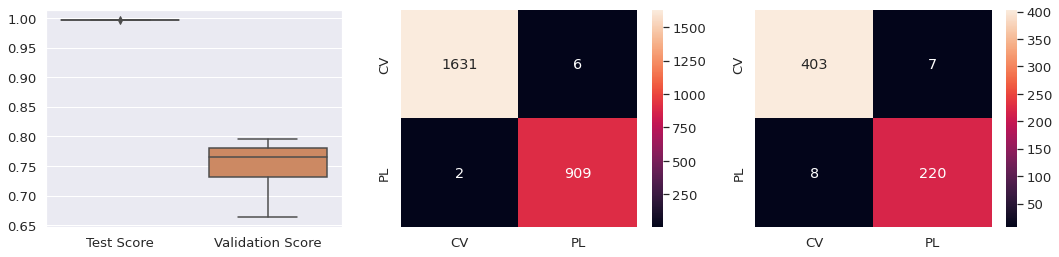

In [16]:
sns.set(font_scale=1.2)
fig , ax = plt.subplots(nrows=1 , ncols=3 , figsize = (18,4))
sns.boxplot(data = score , ax = ax[0])
cf = confusion_matrix(y_train , clf.predict(x_train) , )
sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[1] , xticklabels =class_to_select , yticklabels = class_to_select )
cf = confusion_matrix(y_test , clf.predict(x_test) , )
sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[2] , xticklabels=class_to_select, yticklabels = class_to_select)
#cf = confusion_matrix(y_val , clf.predict(x_val))
#sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[3])
#plt.savefig('all-src-split-obs-classification.jpg')
plt.show()
#score

In [391]:
pd.DataFrame({
    'feat' : x_train.columns.to_list() , 
    'val' : clf.feature_importances_
}).sort_values('val' , ascending=False).reset_index(drop=True)

,feat,val
0,photflux_aper_m,0.149696
1,var_inter_prob_m,0.135717
2,flux_aper_m,0.081213
3,var_inter_sigma_h,0.063748
4,var_inter_prob_s,0.054214
5,var_inter_index_h,0.043667
6,var_inter_sigma_m,0.042827
7,var_inter_sigma_b,0.036619
8,var_min_b,0.033070
9,var_inter_prob_b,0.032857
